# Exploração inicial do dataset de churn

Este notebook carrega o dataset tratado, valida a coluna alvo e realiza uma exploração descritiva focada em churn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
data_path = "../data/processed/churn_final.csv"
df = pd.read_csv(data_path)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,tenure_months,avg_monthly_charge,service_count,churn_binary
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,One year,Yes,Mailed check,65.6,593.30,9,65.922222,4,0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,Yes,Month-to-month,No,Mailed check,59.9,542.40,9,60.266667,3,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,73.9,280.85,4,70.212500,2,1
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,13,95.219231,5,1
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Mailed check,83.9,267.40,3,89.133333,3,1


In [3]:
df.shape

(7267, 25)

In [4]:
df.dtypes

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
tenure_months                  int64
avg_monthly_charge           float64
service_count                  int64
churn_binary                   int64
dtype: object

In [5]:
df.isnull().sum().sort_values(ascending=False).head(10)

Churn                       224
customerID                    0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
dtype: int64

In [8]:
df["churn_binary"].value_counts(normalize=True)

churn_binary
0    0.74281
1    0.25719
Name: proportion, dtype: float64

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7267.0,0.162653,0.369074,0.00,0.000,0.00000,0.000000,1.00
customer.tenure,7267.0,32.346498,24.571773,0.00,9.000,29.00000,55.000000,72.00
account.Charges.Monthly,7267.0,64.720098,30.129572,18.25,35.425,70.30000,89.875000,118.75
account.Charges.Total,7267.0,2279.287581,2267.178963,18.80,401.400,1391.00000,3778.525000,8684.80
tenure_months,7267.0,32.346498,24.571773,0.00,9.000,29.00000,55.000000,72.00
avg_monthly_charge,7267.0,64.658892,30.305125,0.00,35.465,70.22807,90.174158,121.40
service_count,7267.0,3.358745,2.062729,0.00,1.000,3.00000,5.000000,8.00
churn_binary,7267.0,0.257190,0.437115,0.00,0.000,0.00000,1.000000,1.00


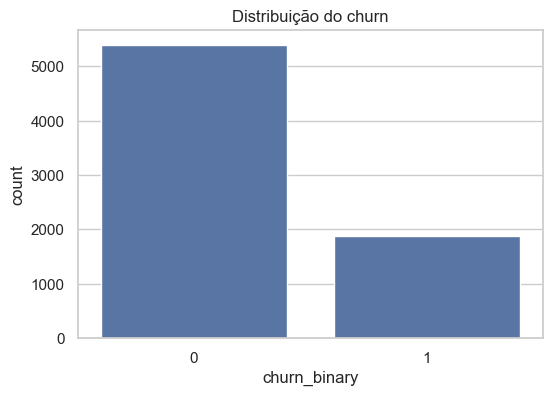

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="churn_binary")
plt.title("Distribuição do churn")
plt.show()

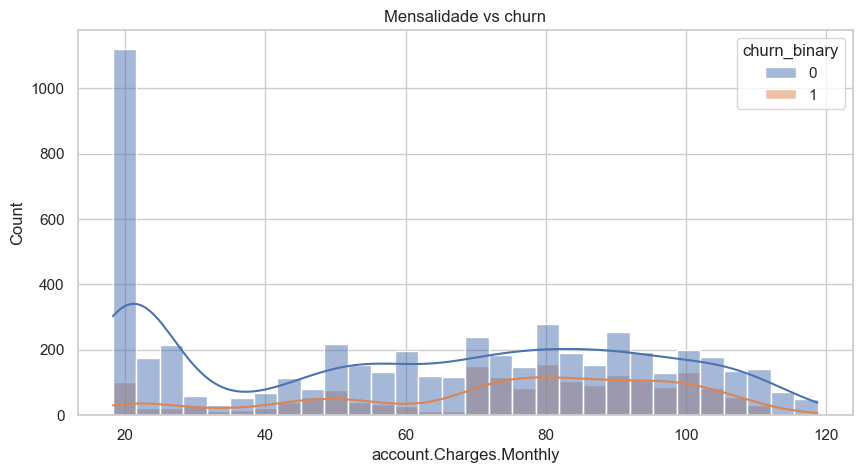

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="account.Charges.Monthly", hue="churn_binary", kde=True, bins=30)
plt.title("Mensalidade vs churn")
plt.show()

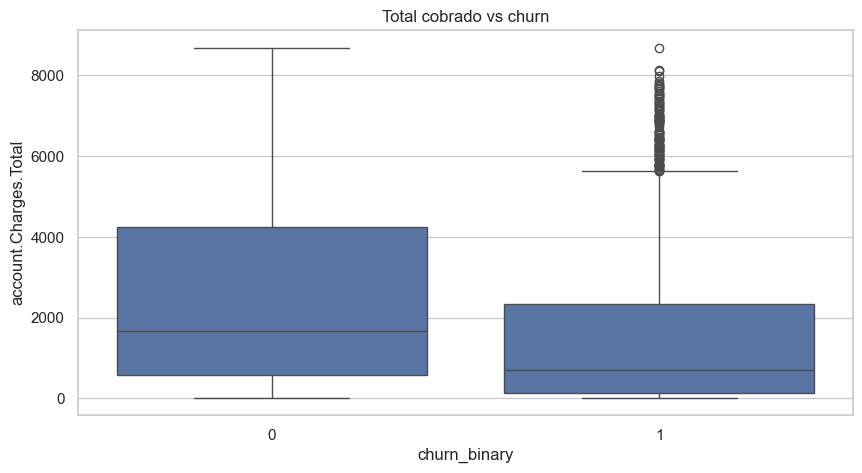

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="churn_binary", y="account.Charges.Total")
plt.title("Total cobrado vs churn")
plt.show()

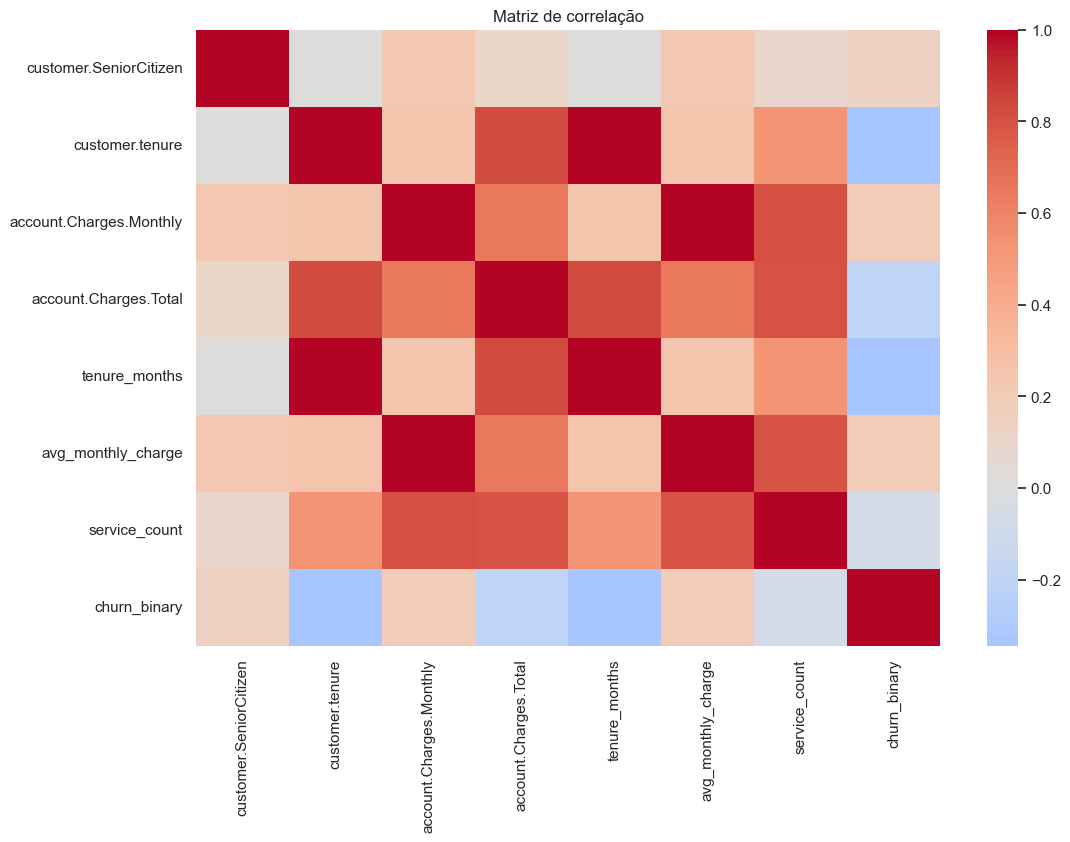

In [13]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlação")
plt.show()

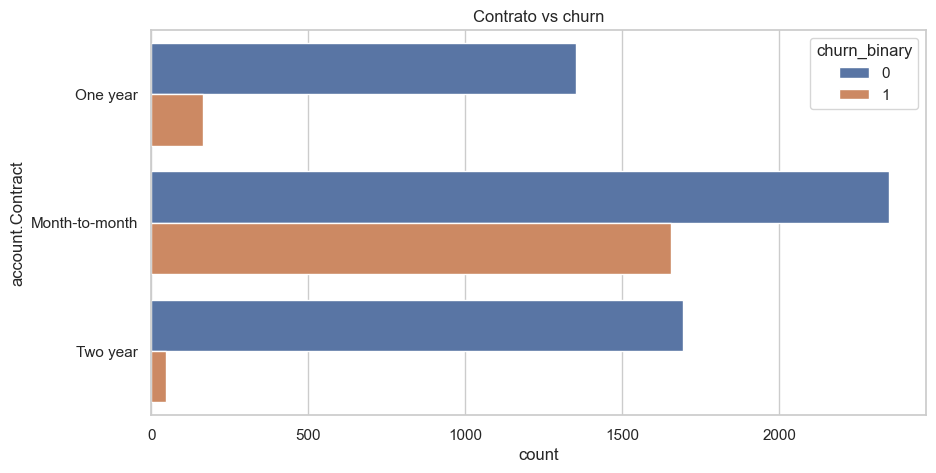

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="account.Contract", hue="churn_binary")
plt.title("Contrato vs churn")
plt.show()

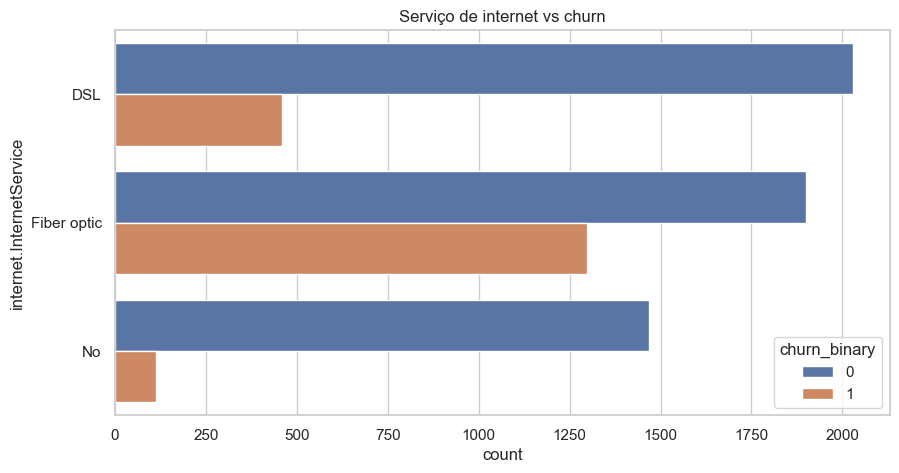

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="internet.InternetService", hue="churn_binary")
plt.title("Serviço de internet vs churn")
plt.show()

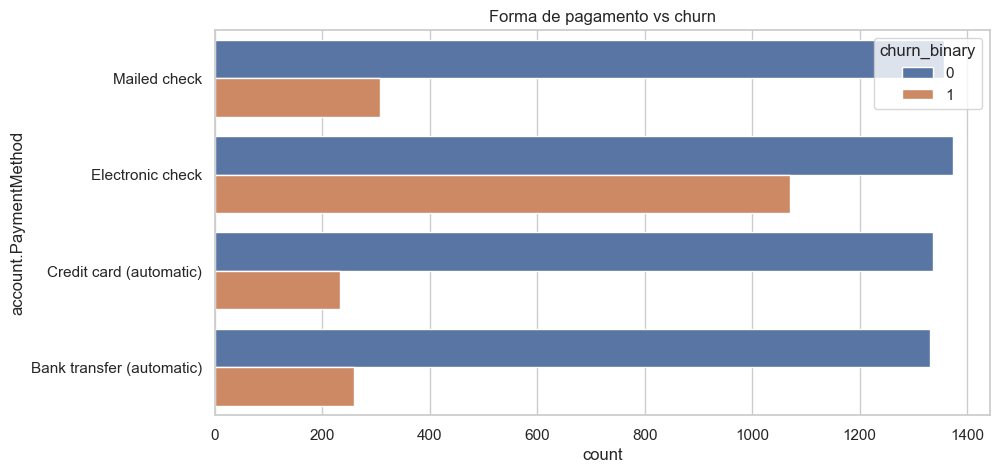

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="account.PaymentMethod", hue="churn_binary")
plt.title("Forma de pagamento vs churn")
plt.show()